In [2]:
import json
import pandas as pd  
import numpy as np
from pandas.io.json import json_normalize

In [2]:
main_categories = {'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas', 'Bicycles', 'Education', 'Event Planning & Services', 'Financial Services', 'Food', 'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor', 'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services', 'Public Services & Government', 'Religious Organizations', 'Restaurants', 'Shopping'}

In [3]:
business_json = []
for line in open('../data/business.json', 'r'):
    business_json.append(json.loads(line))
business = json_normalize(business_json)

In [17]:
json_normalize(business_json, record_path=['attributes'])

TypeError: object of type 'NoneType' has no len()

In [4]:
business.axes

[RangeIndex(start=0, stop=192609, step=1),
 Index(['address', 'attributes', 'attributes.AcceptsInsurance',
        'attributes.AgesAllowed', 'attributes.Alcohol', 'attributes.Ambience',
        'attributes.BYOB', 'attributes.BYOBCorkage', 'attributes.BestNights',
        'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
        'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
        'attributes.ByAppointmentOnly', 'attributes.Caters',
        'attributes.CoatCheck', 'attributes.Corkage',
        'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
        'attributes.DriveThru', 'attributes.GoodForDancing',
        'attributes.GoodForKids', 'attributes.GoodForMeal',
        'attributes.HairSpecializesIn', 'attributes.HappyHour',
        'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel',
        'attributes.Open24Hours', 'attributes.OutdoorSeating',
        'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
  

In [5]:
business['categories'] = business['categories'].str.split(", ")

In [6]:
business['categories'] = business['categories'].apply(lambda x: set(np.sort(x)) if x is not None else x)

In [7]:
#business['categories'].value_counts()

In [7]:
def resolveToMainCategory(category, main_categories):
    if category is None:
        return None
    main_cat = []
    for cat in category:
        if cat in main_categories:
            main_cat.append(cat)
    main_cat.sort()
    return set(main_cat)

In [8]:
business['main_categories'] = business['categories'].apply(lambda x: resolveToMainCategory(x, main_categories))

In [9]:
business['main_categories'].value_counts()

{Restaurants}                                                                                                                       35639
{Shopping}                                                                                                                          14871
{Beauty & Spas}                                                                                                                     12931
{Restaurants, Food}                                                                                                                 11707
{Home Services}                                                                                                                     11131
{Health & Medical}                                                                                                                  10767
{Food}                                                                                                                              10418
{Automotive}                      

#### Only choose businesses with Try to understand all the attributes in the business

We found that all the businesses have at least 13 attributes. These are: 

address, business_id, categories, city, is_open, latitude, longitude, name, postal_code, review_count, stars, state, main_categories

In [96]:
def isCategoryInSeries(category, businesses):
    #print (business, businesses)
    if businesses is None:
        return False
    return businesses.issubset(category) 

def findBusinessByCategory(category, df, searchBy):
    return df[searchBy].apply(lambda x : isCategoryInSeries(category, x))

full_categories = ['address', 'business_id', 'categories', 'city', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state', 'main_categories']

In [105]:
def perMainCategoryAnalysis(main_category, df2):
    res = findBusinessByCategory(main_category, df2, 'main_categories')
    df = df2[res].copy()
    rows = df.shape[0]
    
    print('Total available records: ', rows)
    
    columnsToDrop = full_categories

    for i in range(0, 61):
        num = sum(df[df.columns[i]].notnull())
        if num < (rows/100):
            print(df.columns[i], num)
            columnsToDrop.append(df.columns[i])
            
    df = df.drop(columns=columnsToDrop)
    df.count(axis=1).hist(bins=30)
    return df


Total available records:  35639
attributes 0
attributes.AcceptsInsurance 0
attributes.AgesAllowed 0
attributes.BYOB 13
attributes.BestNights 5
attributes.ByAppointmentOnly 10
attributes.CoatCheck 7
attributes.DietaryRestrictions 23
attributes.GoodForDancing 11
attributes.HairSpecializesIn 0
attributes.HappyHour 14
attributes.Music 10
attributes.Open24Hours 3
attributes.RestaurantsCounterService 5
attributes.Smoking 27
hours 0


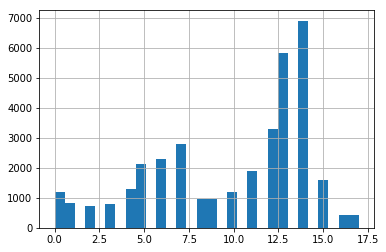

In [112]:
food = perMainCategoryAnalysis({'Restaurants'}, business)

,attributes.Alcohol,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.DogsAllowed,attributes.OutdoorSeating,attributes.RestaurantsPriceRange2,attributes.WheelchairAccessible,attributes.WiFi,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday
2,u'beer_and_wine',True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,2,NaN,u'no',17:30-22:0,17:30-21:30,17:30-22:0,17:30-21:0,17:30-21:30,NaN,17:30-21:30
11,u'none',NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,1,NaN,u'no',7:0-1:0,7:0-0:0,7:0-1:0,7:0-0:0,7:0-1:0,7:0-0:0,7:0-0:0
13,u'none',True,NaN,True,None,NaN,False,2,NaN,NaN,10:0-1:0,10:0-0:0,10:0-1:0,10:0-0:0,10:0-0:0,10:0-0:0,10:0-0:0
17,u'full_bar',NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,2,NaN,u'no',NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,u'full_bar',NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,2,NaN,NaN,11:0-23:0,11:0-22:0,11:0-23:0,11:0-22:0,11:0-23:0,11:0-22:0,11:0-23:0
45,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,u'none',True,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,False,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,'none',True,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,False,1,NaN,u'no',11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
73,'none',True,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,False,2,True,'no',11:0-20:0,11:0-20:0,NaN,NaN,11:0-20:0,11:0-20:0,11:0-20:0


In [114]:
business['attributes.Ambience']

0                                                       NaN
1         {'romantic': False, 'intimate': False, 'classy...
2         {'romantic': False, 'intimate': False, 'touris...
3                                                       NaN
4                                                       NaN
5                                                       NaN
6                                                       NaN
7                                                       NaN
8                                                       NaN
9                                                       NaN
10                                                      NaN
11        {'romantic': False, 'intimate': False, 'touris...
12        {'touristy': False, 'hipster': False, 'romanti...
13                                                     None
14                                                      NaN
15                                                      NaN
16                                      

In [78]:
#res = findBusinessByCategory({'Restaurants', 'Food', 'Nightlife'}, business, 'main_categories')
res = findBusinessByCategory({'Nightlife'}, business, 'main_categories')
df = business[res].copy()
df.shape

(2342, 61)

In [93]:
df.shape[0]

2342

In [95]:
columnsToDrop = []

for i in range(0, 61):
    num = sum(df[df.columns[i]].notnull())
    if num < 100 or num == 2342:
        print(df.columns[i], num)
        columnsToDrop.append(df.columns[i])

IndexError: index 26 is out of bounds for axis 0 with size 26

In [72]:
columnsToDrop

['attributes',
 'attributes.AcceptsInsurance',
 'attributes.AgesAllowed',
 'attributes.BYOB',
 'attributes.ByAppointmentOnly',
 'attributes.Corkage',
 'attributes.DietaryRestrictions',
 'attributes.HairSpecializesIn',
 'attributes.Open24Hours',
 'attributes.RestaurantsCounterService',
 'hours']

In [88]:
df = df.drop(columns=columnsToDrop)

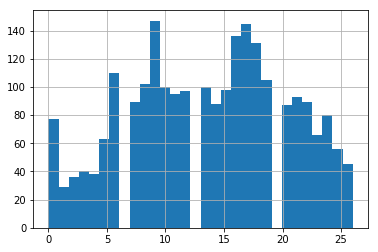

In [89]:
df.count(axis=1).hist(bins=30)

In [92]:
df

,attributes.Alcohol,attributes.Ambience,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.CoatCheck,attributes.GoodForDancing,attributes.HappyHour,attributes.HasTV,...,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday
122,u'full_bar',"{'touristy': False, 'hipster': False, 'romanti...",NaN,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,u'full_bar',None,"{'monday': False, 'tuesday': False, 'friday': ...",False,NaN,None,False,False,NaN,False,...,u'no',NaN,NaN,16:0-3:0,16:0-3:0,16:0-3:0,16:0-3:0,16:0-3:0,16:0-3:0,16:0-3:0
281,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,True,False,NaN,False,NaN,True,True,...,u'yes',False,u'free',9:0-2:0,9:0-15:0,9:0-2:0,NaN,9:0-2:0,9:0-2:0,9:0-2:0
344,u'full_bar',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,...,NaN,NaN,NaN,22:0-2:0,22:0-2:0,22:0-2:0,22:0-2:0,22:0-2:0,22:0-2:0,22:0-2:0
427,u'full_bar',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,'full_bar',NaN,NaN,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,True,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,True,...,NaN,NaN,NaN,17:0-2:0,17:0-2:0,17:0-2:0,17:0-2:0,17:0-2:0,17:0-2:0,17:0-2:0
716,'full_bar',"{'touristy': False, 'hipster': True, 'romantic...","{'monday': False, 'tuesday': False, 'friday': ...",True,NaN,"{'garage': False, 'street': True, 'validated':...",False,False,True,False,...,u'no',NaN,'no',17:0-2:0,17:0-1:0,17:0-2:0,17:0-1:0,17:0-2:0,17:0-1:0,17:0-2:0
720,u'full_bar',NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,u'full_bar',NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,False,...,NaN,NaN,NaN,18:0-3:0,18:0-3:0,18:0-3:0,18:0-3:0,18:0-3:0,18:0-3:0,18:0-3:0


In [3]:
checkin = pd.read_json('../data/checkin.json', lines=True)


In [4]:
photo = pd.read_json('../data/photo.json', lines=True)


In [5]:
review = pd.read_json('../data/review.json', lines=True)

In [ ]:
review.axes

In [ ]:
tip = pd.read_json('../data/tip.json', lines=True)


In [3]:
user = pd.read_json('../data/user.json', lines=True)

In [4]:
user.axes

[RangeIndex(start=0, stop=1637138, step=1),
 Index(['average_stars', 'compliment_cool', 'compliment_cute',
        'compliment_funny', 'compliment_hot', 'compliment_list',
        'compliment_more', 'compliment_note', 'compliment_photos',
        'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
        'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
        'user_id', 'yelping_since'],
       dtype='object')]

In [63]:
user.friends.apply(lambda x: len(x.split(',')))

0            99
1          1152
2            15
3           525
4           231
5          5450
6          4326
7          1193
8           382
9           898
10          194
11           83
12          582
13           25
14          248
15          367
16          286
17          258
18         3451
19           46
20          418
21          694
22         1098
23          287
24          273
25           40
26          209
27          101
28          484
29          455
           ... 
1637108       1
1637109       1
1637110       1
1637111       1
1637112       1
1637113       1
1637114       1
1637115       1
1637116       1
1637117       1
1637118       1
1637119       1
1637120       1
1637121       1
1637122       1
1637123       1
1637124       1
1637125       1
1637126       1
1637127       1
1637128       1
1637129       1
1637130       1
1637131       1
1637132       1
1637133       1
1637134       1
1637135       1
1637136       1
1637137       1
Name: friends, Length: 1

In [ ]:
def hoursLeft